In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
%matplotlib inline

In [2]:
airbnb = pd.read_csv("airbnb-with-distances.csv")

In [3]:
pd.concat([airbnb.isnull().sum(), (airbnb.isnull().sum()/airbnb.isnull().count()).apply(lambda x: "{0:.2f}%".format(x * 100))], axis=1, keys=["Missing Value", "Missing Value (%)"])

,Missing Value,Missing Value (%)
room_id,0,0.00%
host_id,0,0.00%
room_type,9,0.05%
borough,19377,100.00%
neighborhood,0,0.00%
reviews,0,0.00%
overall_satisfaction,7216,37.24%
accommodates,0,0.00%
bedrooms,9,0.05%
price,9,0.05%


In [4]:
airbnb["price"].isnull().value_counts()

False    19368
True         9
Name: price, dtype: int64

In [5]:
airbnb = airbnb[airbnb["price"].isnull() == False]
airbnb = airbnb.drop(["room_id", "host_id", "borough", "latitude", "longitude", "last_modified"], axis=1)
airbnb.loc[airbnb["minstay"].isnull() == True, "minstay"] = 1
print(airbnb.info())
airbnb = airbnb.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19368 entries, 0 to 19376
Data columns (total 11 columns):
room_type               19368 non-null object
neighborhood            19368 non-null object
reviews                 19368 non-null int64
overall_satisfaction    12157 non-null float64
accommodates            19368 non-null int64
bedrooms                19368 non-null float64
price                   19368 non-null float64
minstay                 19368 non-null float64
train_dist              19368 non-null float64
bus_dist                19368 non-null float64
road_dist               19368 non-null float64
dtypes: float64(7), int64(2), object(2)
memory usage: 1.8+ MB
None


In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12157 entries, 0 to 19376
Data columns (total 11 columns):
room_type               12157 non-null object
neighborhood            12157 non-null object
reviews                 12157 non-null int64
overall_satisfaction    12157 non-null float64
accommodates            12157 non-null int64
bedrooms                12157 non-null float64
price                   12157 non-null float64
minstay                 12157 non-null float64
train_dist              12157 non-null float64
bus_dist                12157 non-null float64
road_dist               12157 non-null float64
dtypes: float64(7), int64(2), object(2)
memory usage: 1.1+ MB


In [7]:
airbnb.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,train_dist,bus_dist,road_dist
0,Private room,TS29,13,4.5,1,1.0,39.0,5.0,0.011387,0.000671,0.000005
2,Entire home/apt,TS20,4,5.0,2,1.0,76.0,2.0,0.006174,0.002294,0.000765
3,Private room,TS15,7,5.0,1,1.0,45.0,7.0,0.003616,0.000573,0.000354
4,Private room,MK18,14,5.0,2,1.0,58.0,4.0,0.008916,0.003126,0.003503
6,Private room,TS17,4,3.5,6,1.0,103.0,1.0,0.004462,0.001469,0.000959


#  

In [8]:
airbnb["price"].describe()

count    12157.000000
mean       104.893724
std        123.372714
min         10.000000
25%         48.000000
50%         80.000000
75%        134.000000
max       7957.000000
Name: price, dtype: float64

Skewness: 26.059082
Kurtosis: 1433.335820


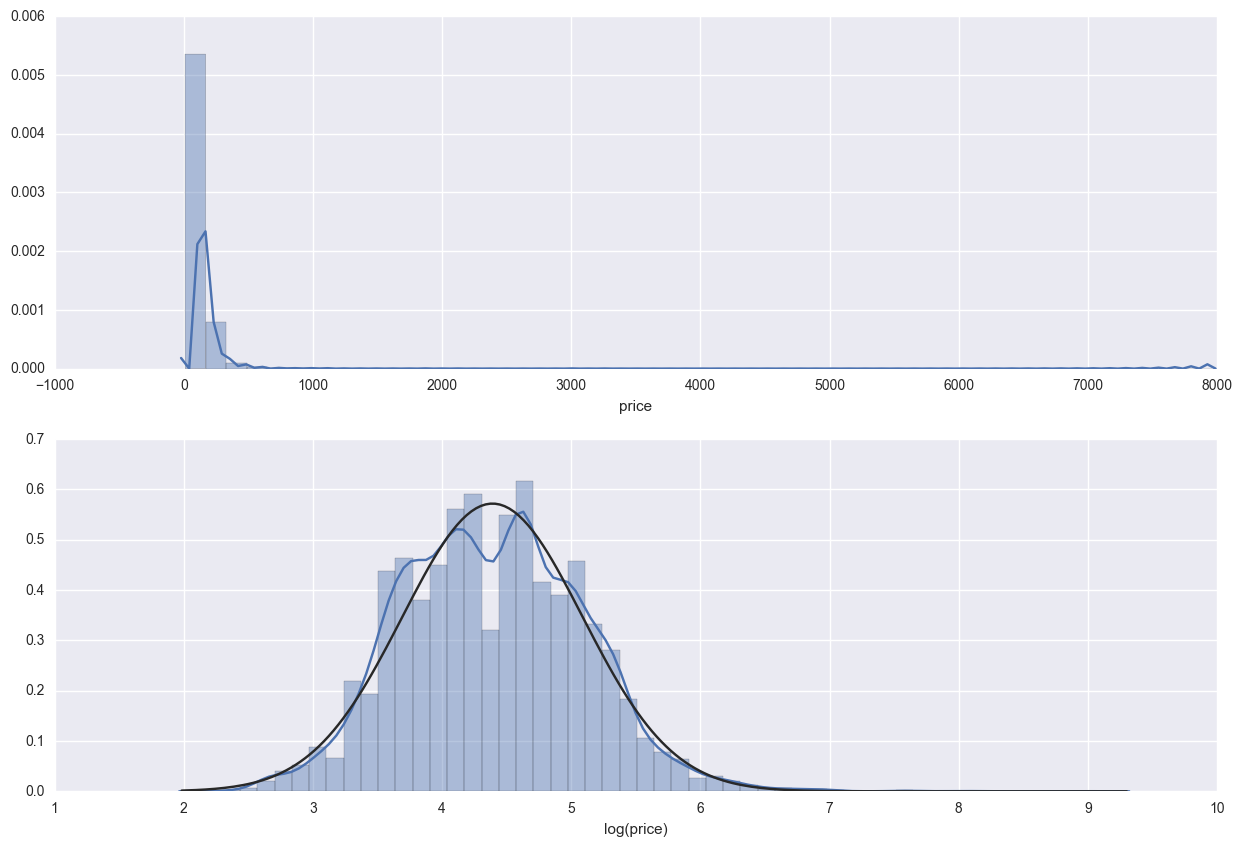

In [9]:
sns.set()
fig, ax = plt.subplots(2,1)
fig.set_size_inches(15, 10)
print("Skewness: %f" % airbnb["price"].skew())
print("Kurtosis: %f" % airbnb["price"].kurt())
sns.distplot(airbnb["price"], ax=ax[0])
sns.distplot(airbnb["price"].apply(np.log), ax=ax[1], fit=norm)
ax[1].set_xlabel("log(price)")

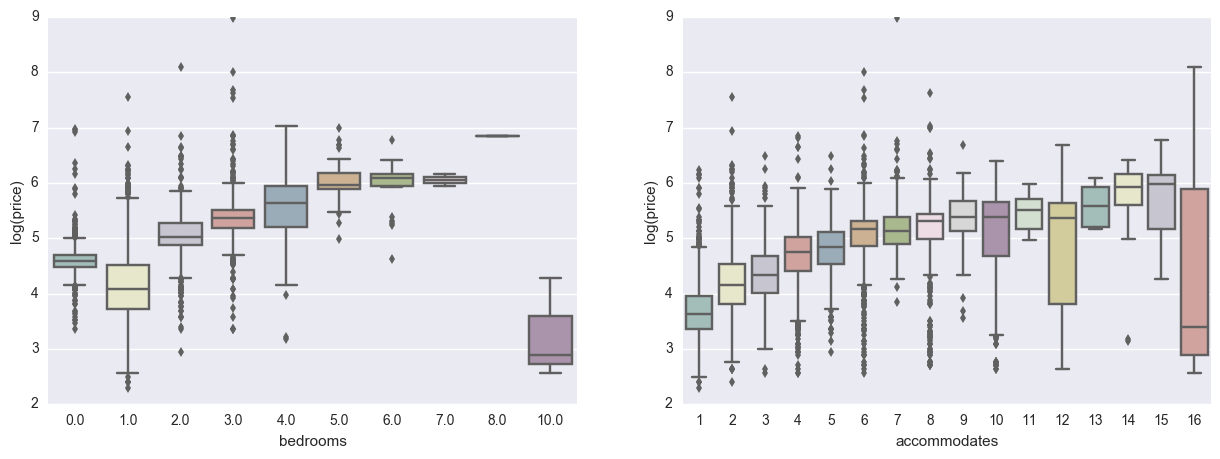

In [10]:
sns.set_palette("Set3", n_colors=16, desat=.5)
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 5)
sns.boxplot(x="bedrooms", y=airbnb["price"].apply(np.log), data=airbnb, ax=ax[0])
sns.boxplot(x="accommodates", y=airbnb["price"].apply(np.log), data=airbnb, ax=ax[1])
ax[0].set_ylabel("log(price)")
ax[1].set_ylabel("log(price)")

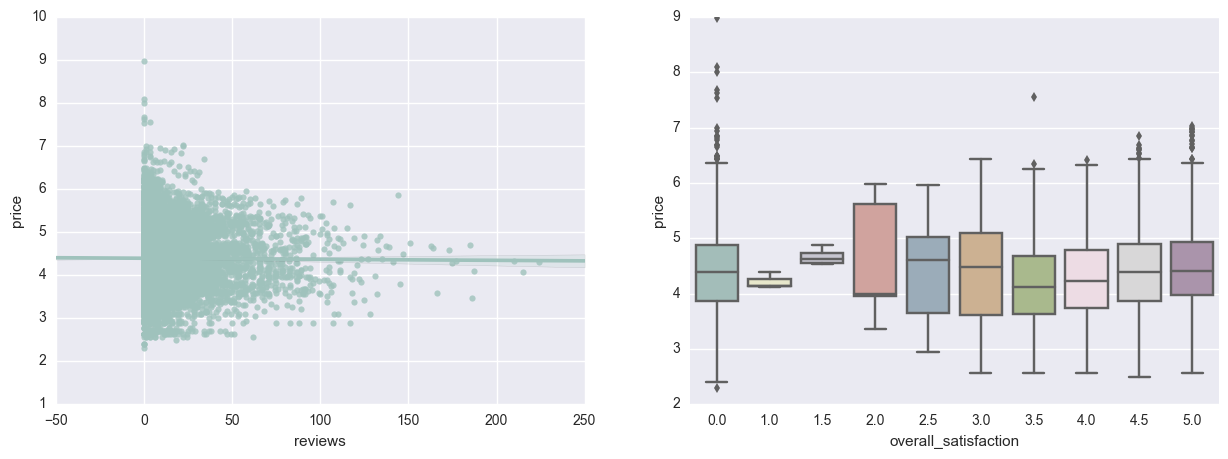

In [11]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 5)
sns.regplot(x="reviews", y=airbnb["price"].apply(np.log), data=airbnb, ax=ax[0])
sns.boxplot(x="overall_satisfaction", y=airbnb["price"].apply(np.log), data=airbnb, ax=ax[1])

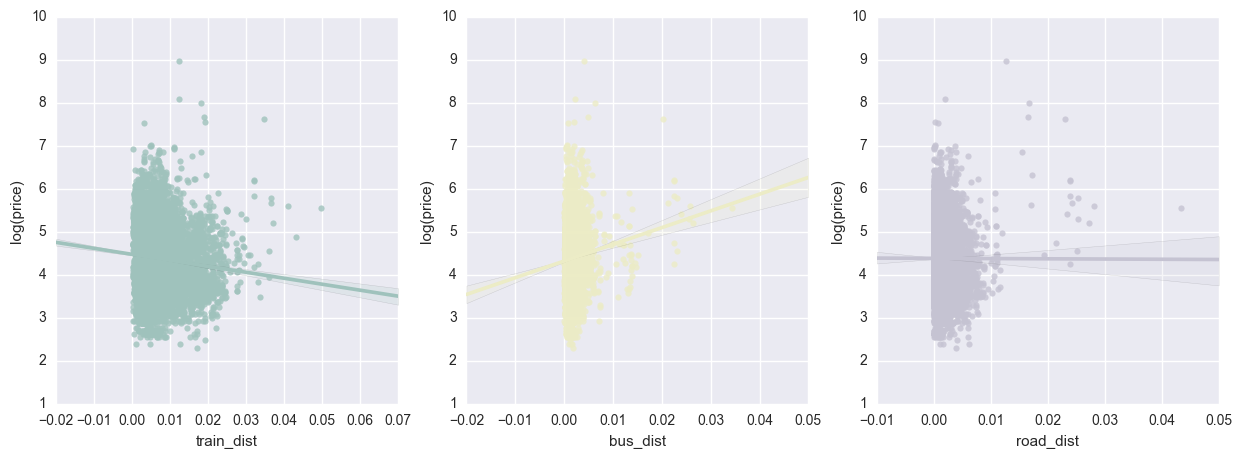

In [12]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)
sns.regplot(x="train_dist", y=airbnb["price"].apply(np.log), data=airbnb, ax=ax[0])
sns.regplot(x="bus_dist", y=airbnb["price"].apply(np.log), data=airbnb, ax=ax[1])
sns.regplot(x="road_dist", y=airbnb["price"].apply(np.log), data=airbnb, ax=ax[2])
ax[0].set_ylabel("log(price)")
ax[1].set_ylabel("log(price)")
ax[2].set_ylabel("log(price)")

#  

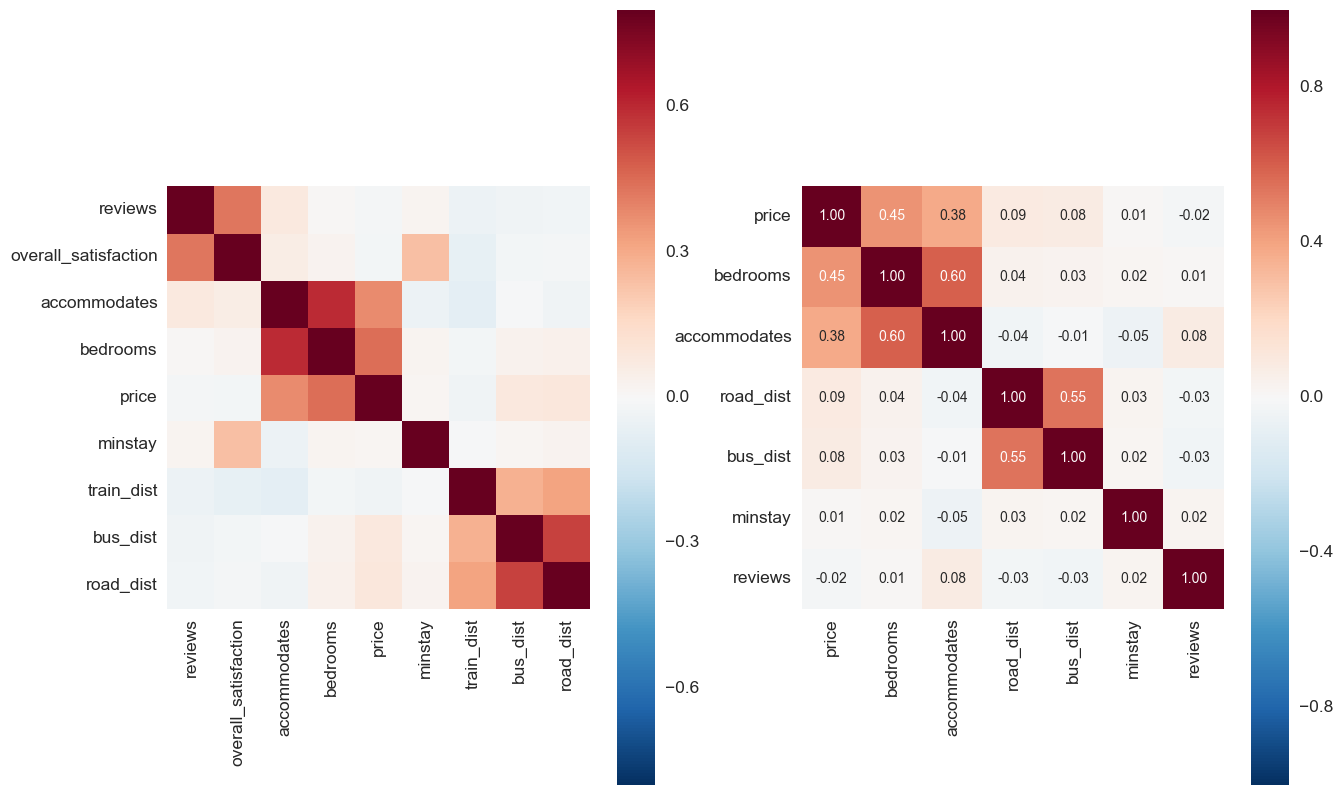

In [13]:
corr = airbnb.corr()
corr_mat = airbnb.corr()
k = 7
cols = corr_mat.nlargest(k, "price")["price"].index
cm = np.corrcoef(airbnb[cols].values.T)

sns.set(font_scale=1.25)
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 10)
sns.heatmap(corr, vmax=.8, square=True, ax=ax[0], )
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values, ax=ax[1])

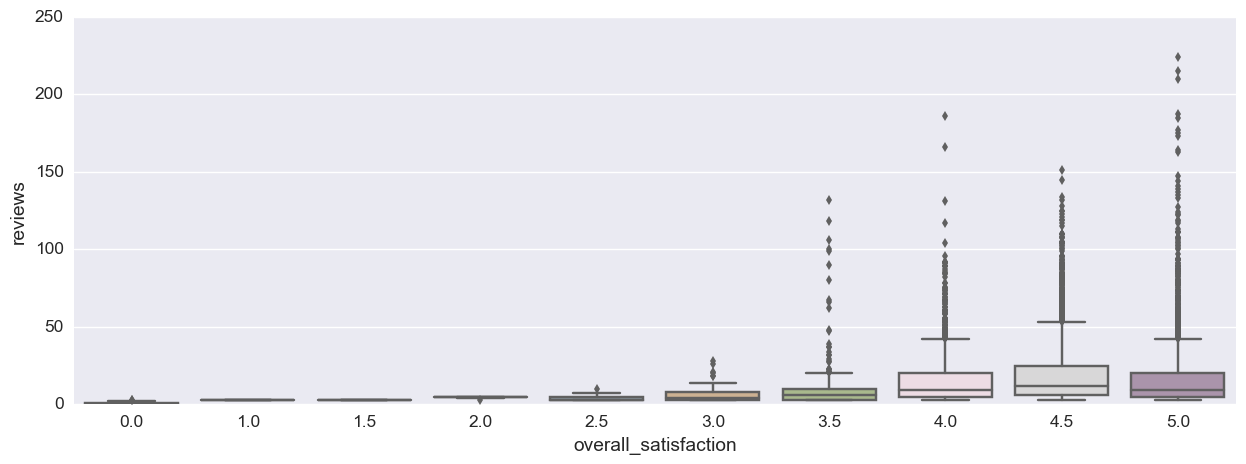

In [14]:
sns.set_palette("Set3", n_colors=16, desat=.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.boxplot(x="overall_satisfaction", y="reviews", data=airbnb)

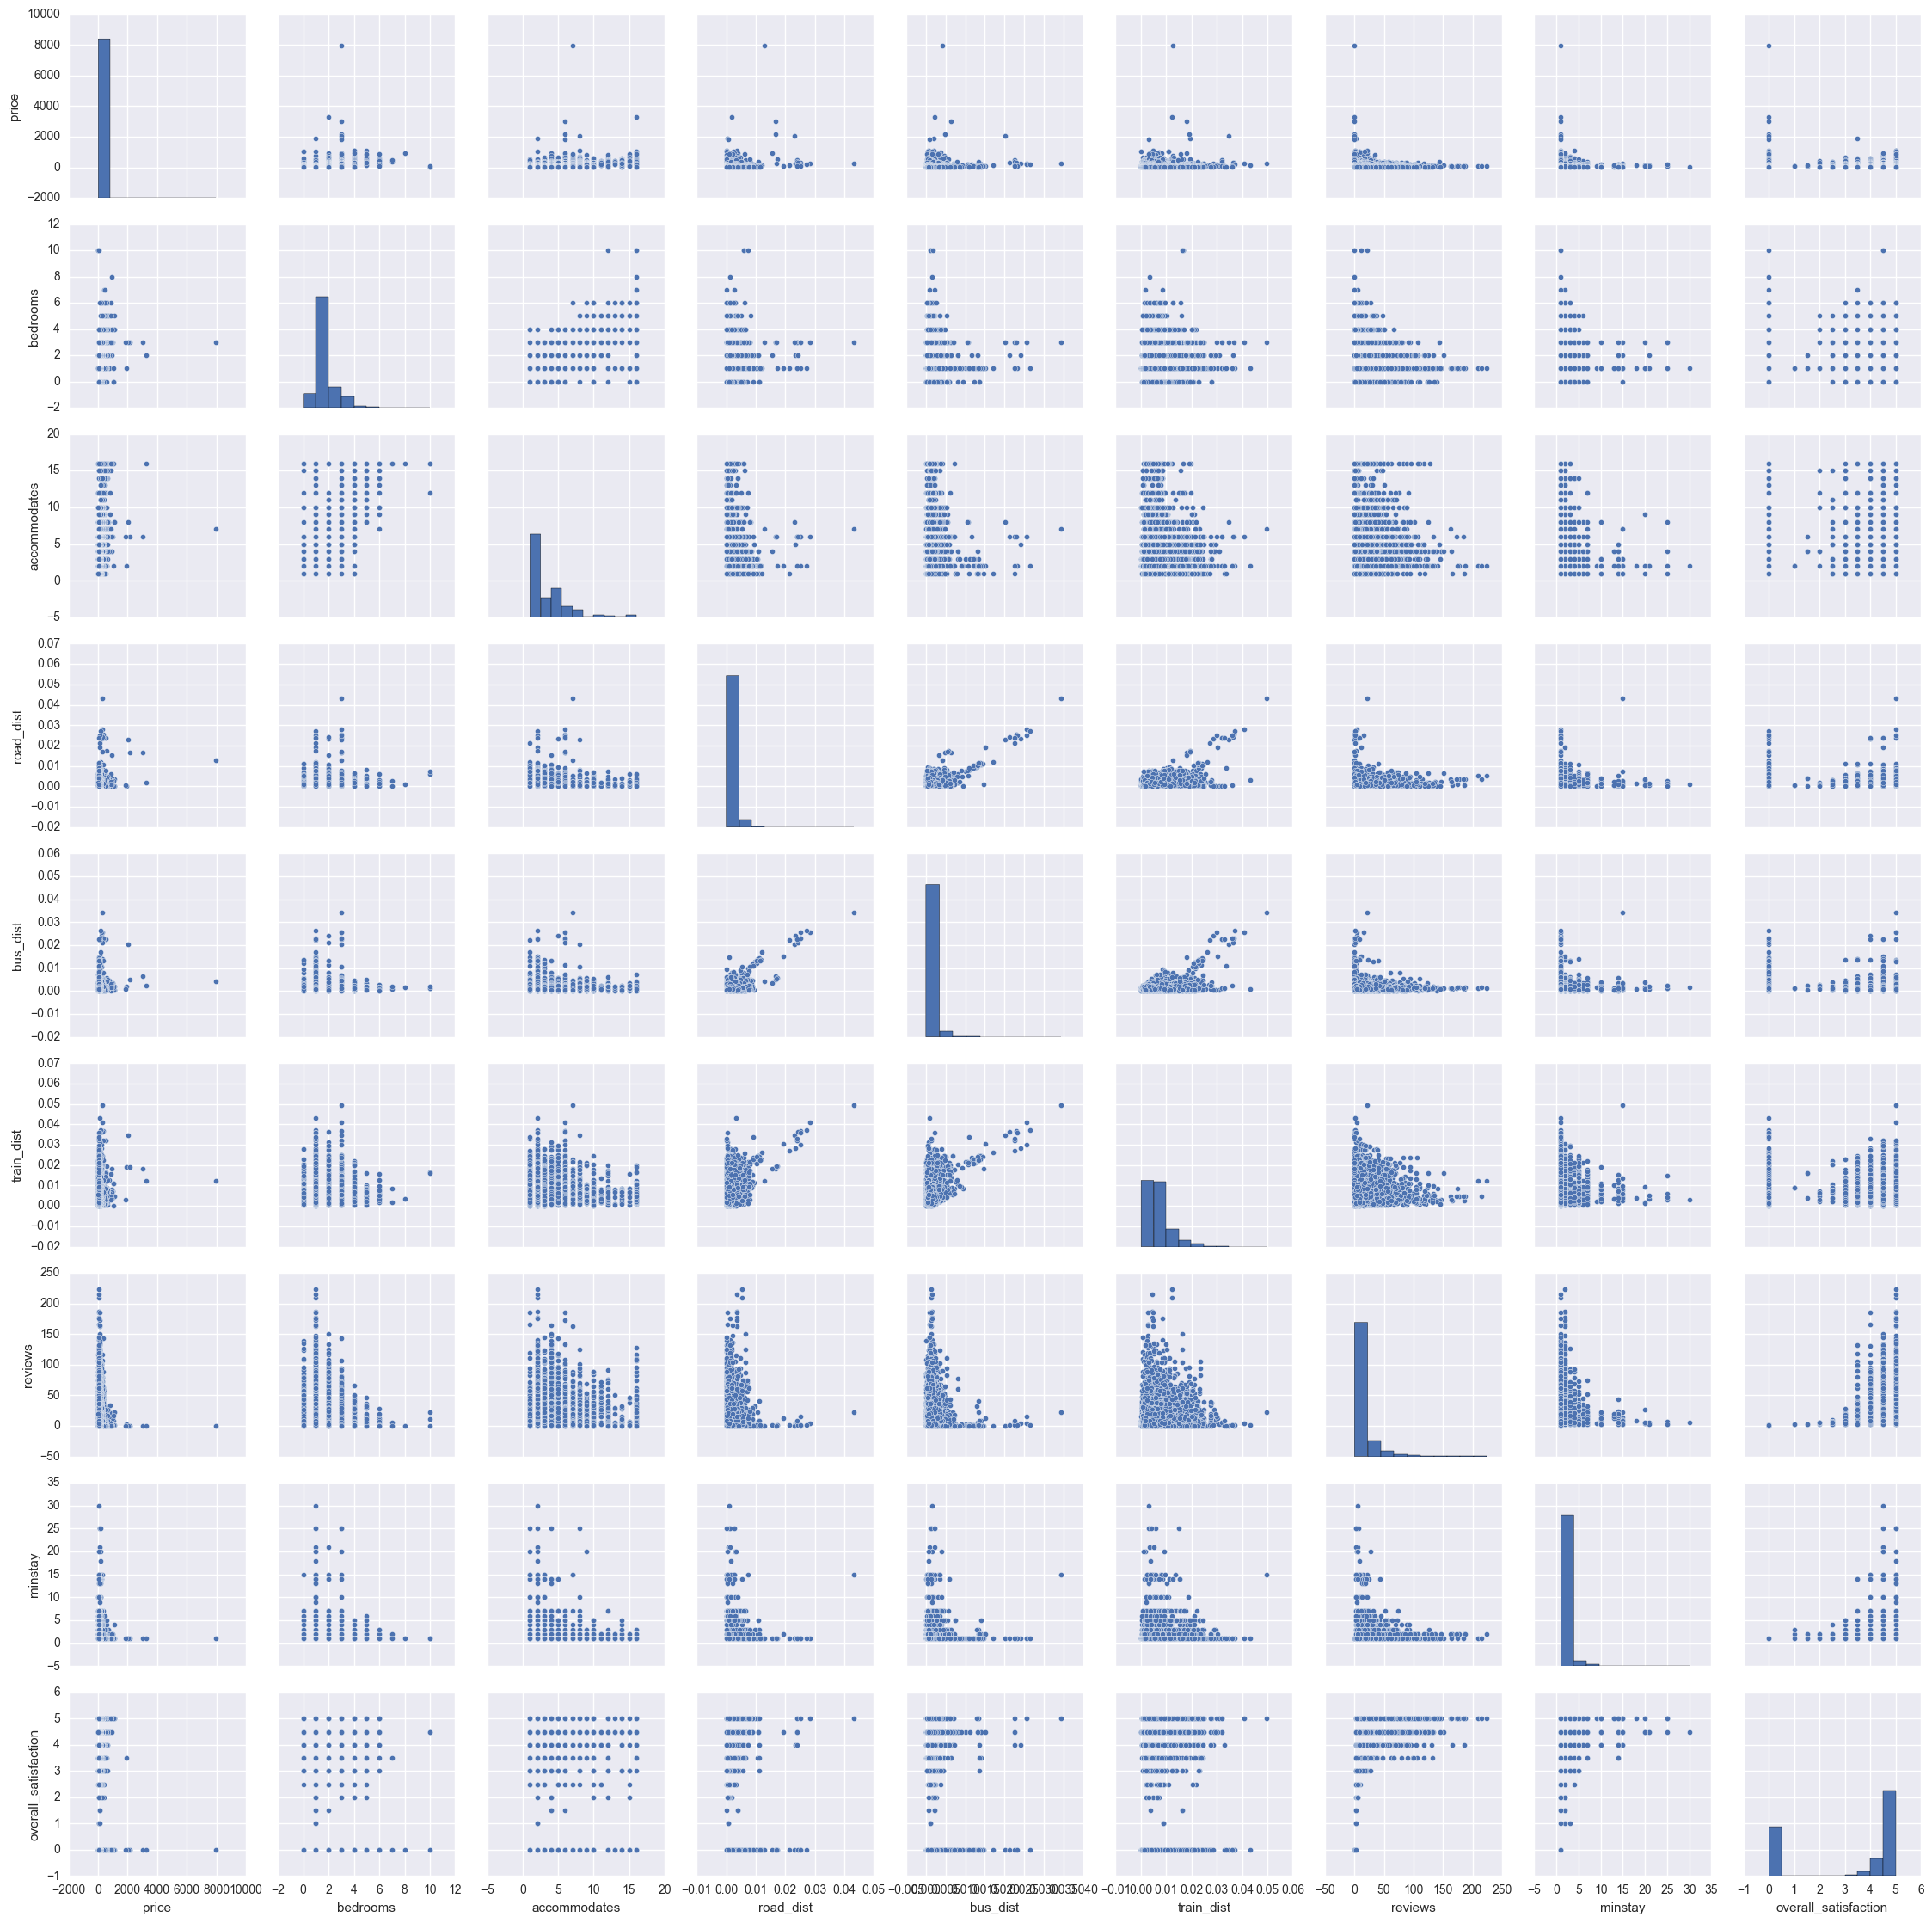

In [15]:
sns.set()
col = ['price', 'bedrooms', 'accommodates', 'road_dist', 'bus_dist',
       'train_dist', 'reviews', 'minstay', 'overall_satisfaction']
sns.pairplot(airbnb[col])

#  

In [16]:
pd.concat([airbnb.isnull().sum().sort_values(ascending=False), (airbnb.isnull().sum()/airbnb.isnull().count()).sort_values(ascending=False)], 
          axis=1, keys=["Total", "Percentage"])

,Total,Percentage
road_dist,0,0.0
bus_dist,0,0.0
train_dist,0,0.0
minstay,0,0.0
price,0,0.0
bedrooms,0,0.0
accommodates,0,0.0
overall_satisfaction,0,0.0
reviews,0,0.0
neighborhood,0,0.0


#  

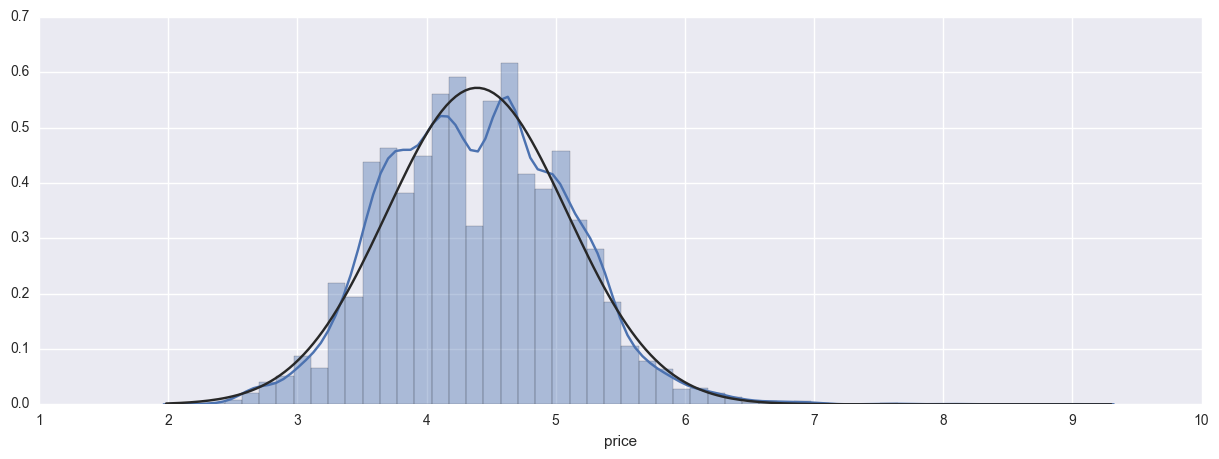

In [17]:
airbnb["price"] = airbnb["price"].apply(np.log)
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.distplot(airbnb["price"], fit=norm)

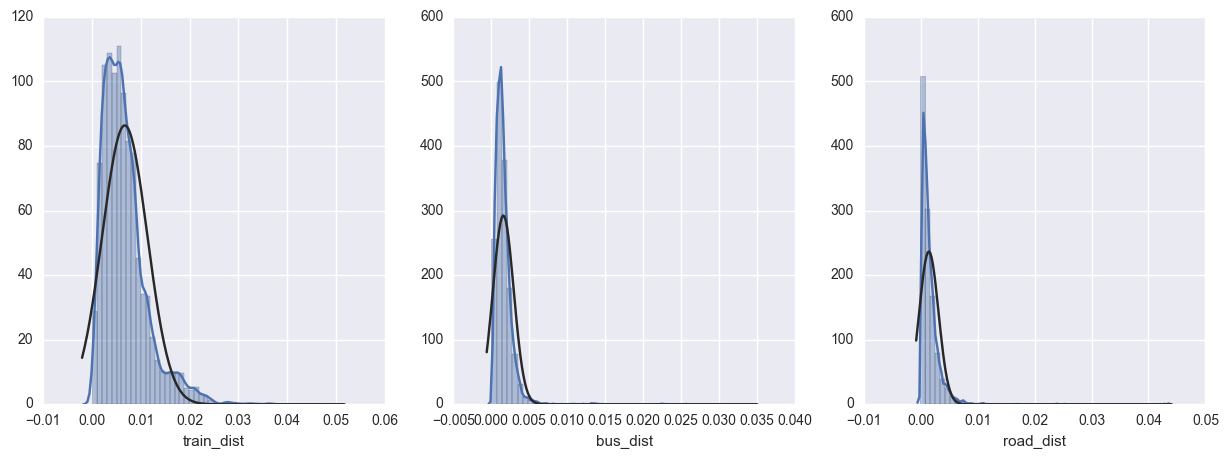

In [18]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)
sns.distplot(airbnb["train_dist"], fit=norm, ax=ax[0])
sns.distplot(airbnb["bus_dist"], fit=norm, ax=ax[1])
sns.distplot(airbnb["road_dist"], fit=norm, ax=ax[2])

((array([-3.85861941, -3.63610928, -3.51407013, ...,  3.51407013,
          3.63610928,  3.85861941]),
  array([  1.37533337e-07,   1.37533337e-07,   1.46409696e-07, ...,
           2.71679065e-02,   2.81967596e-02,   4.33121558e-02])),
 (0.001371188009099104, 0.0014582400707147704, 0.8135695474489949))

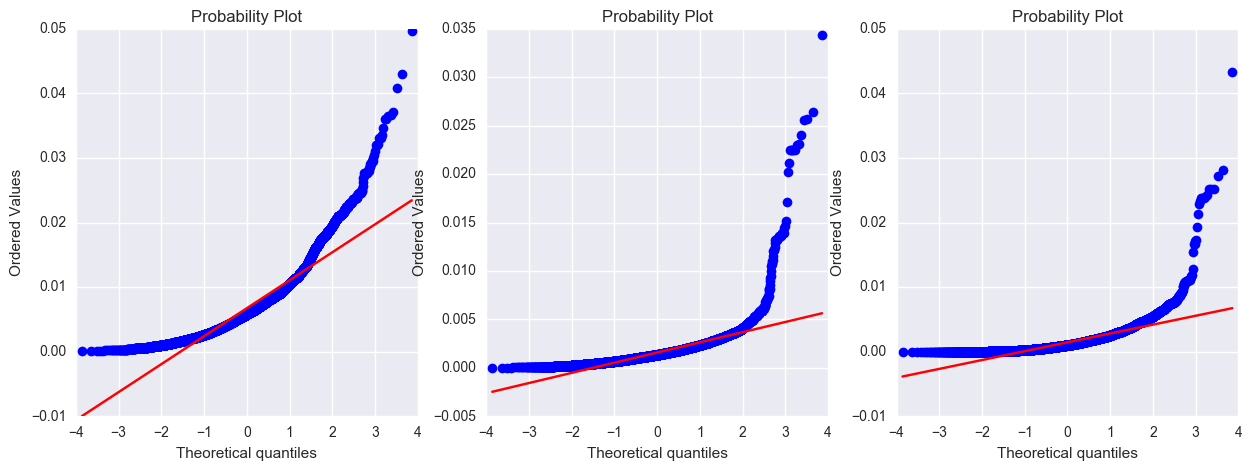

In [19]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)
stats.probplot(airbnb["train_dist"], plot=ax[0])
stats.probplot(airbnb["bus_dist"], plot=ax[1])
stats.probplot(airbnb["road_dist"], plot=ax[2])

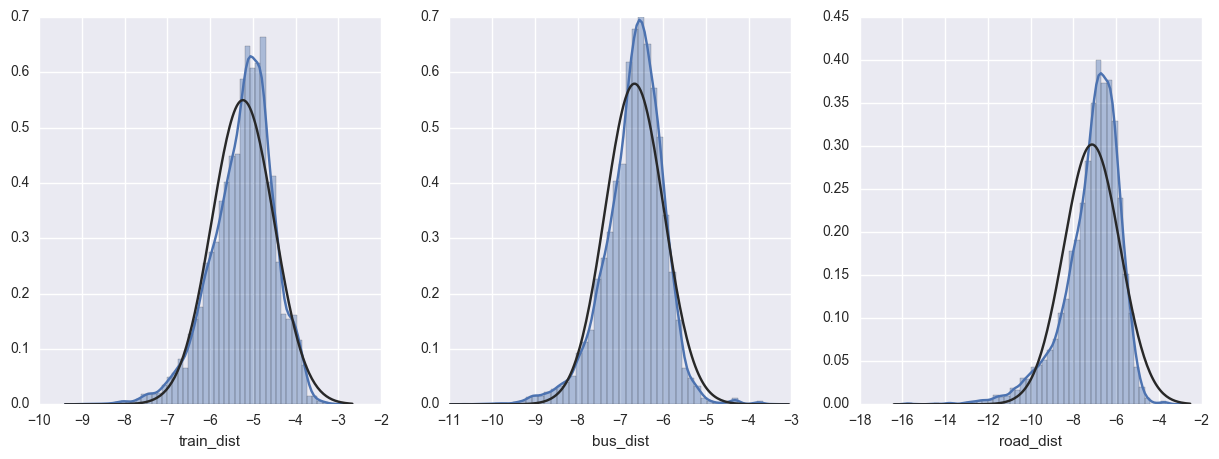

In [20]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)
sns.distplot(airbnb["train_dist"].apply(np.log), fit=norm, ax=ax[0])
sns.distplot(airbnb["bus_dist"].apply(np.log), fit=norm, ax=ax[1])
sns.distplot(airbnb["road_dist"].apply(np.log), fit=norm, ax=ax[2])

((array([-3.85861941, -3.63610928, -3.51407013, ...,  3.51407013,
          3.63610928,  3.85861941]),
  array([-15.7993995 , -15.7993995 , -15.73685701, ...,  -3.60571891,
          -3.56854822,  -3.13932195])),
 (1.2716046458877717, -7.1289320376572807, 0.96161499732545463))

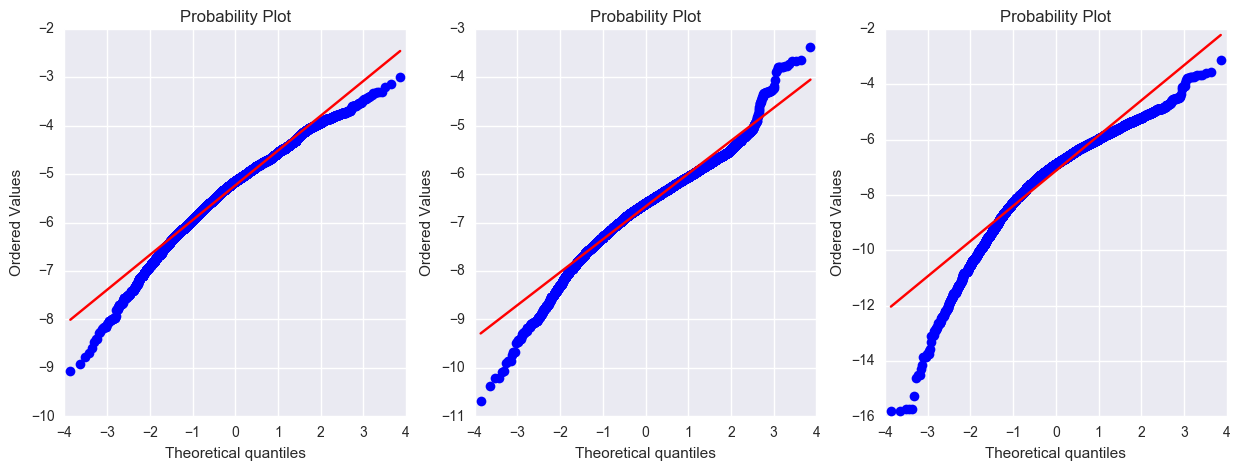

In [21]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)
stats.probplot(airbnb["train_dist"].apply(np.log), plot=ax[0])
stats.probplot(airbnb["bus_dist"].apply(np.log), plot=ax[1])
stats.probplot(airbnb["road_dist"].apply(np.log), plot=ax[2])

In [22]:
airbnb["train_dist"] = airbnb["train_dist"].apply(np.log)
airbnb["road_dist"] = airbnb["road_dist"].apply(np.log)
airbnb["bus_dist"] = airbnb["bus_dist"].apply(np.log)

In [23]:
airbnb.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,train_dist,bus_dist,road_dist
0,Private room,TS29,13,4.5,1,1.0,3.663562,5.0,-4.475283,-7.306198,-12.131445
2,Entire home/apt,TS20,4,5.0,2,1.0,4.330733,2.0,-5.087392,-6.077253,-7.175243
3,Private room,TS15,7,5.0,1,1.0,3.806662,7.0,-5.622387,-7.464947,-7.946521
4,Private room,MK18,14,5.0,2,1.0,4.060443,4.0,-4.719908,-5.768144,-5.654223
6,Private room,TS17,4,3.5,6,1.0,4.634729,1.0,-5.412225,-6.523454,-6.949908


#  

In [24]:
airbnb_X = airbnb.drop(["bedrooms"], axis=1)
airbnb_y = airbnb["price"]

In [25]:
neighborhood_price_mean = airbnb_X.groupby("neighborhood").mean()["price"]
neighborhood_price_mean_25_percentile =  neighborhood_price_mean.describe()["25%"]
neighborhood_price_mean_75_percentile =  neighborhood_price_mean.describe()["75%"]
low = neighborhood_price_mean.loc[neighborhood_price_mean <= neighborhood_price_mean_25_percentile].index
medium = neighborhood_price_mean.loc[(neighborhood_price_mean > neighborhood_price_mean_25_percentile) & (neighborhood_price_mean <= neighborhood_price_mean_75_percentile)].index
high = neighborhood_price_mean.loc[neighborhood_price_mean > neighborhood_price_mean_75_percentile].index

In [26]:
airbnb_X.loc[airbnb_X["neighborhood"].apply(lambda x: x in low) == True, "neighborhood_price"] = "Low Price Area"
airbnb_X.loc[airbnb_X["neighborhood"].apply(lambda x: x in medium) == True, "neighborhood_price"] = "Medium Price Area"
airbnb_X.loc[airbnb_X["neighborhood"].apply(lambda x: x in high) == True, "neighborhood_price"] = "High Price Area"
airbnb_X = airbnb_X.drop("neighborhood", axis=1)

In [27]:
airbnb_X["general_sentiment"] = airbnb["overall_satisfaction"] * airbnb["reviews"]
airbnb_X = airbnb_X.drop(["overall_satisfaction", "reviews"], axis=1)

In [28]:
# airbnb_X["transportation_convenience"] = -(0.38 * airbnb_X["train_dist"] + 0.33 * airbnb_X["bus_dist"] + 0.29 * airbnb_X["road_dist"])
# airbnb_X = airbnb_X.drop(["train_dist", "bus_dist", "road_dist"], axis=1)

In [29]:
airbnb_X.head()

,room_type,accommodates,price,minstay,train_dist,bus_dist,road_dist,neighborhood_price,general_sentiment
0,Private room,1,3.663562,5.0,-4.475283,-7.306198,-12.131445,High Price Area,58.5
2,Entire home/apt,2,4.330733,2.0,-5.087392,-6.077253,-7.175243,High Price Area,20.0
3,Private room,1,3.806662,7.0,-5.622387,-7.464947,-7.946521,Medium Price Area,35.0
4,Private room,2,4.060443,4.0,-4.719908,-5.768144,-5.654223,Medium Price Area,70.0
6,Private room,6,4.634729,1.0,-5.412225,-6.523454,-6.949908,Low Price Area,14.0


#  

In [30]:
airbnb_X = airbnb_X.join(pd.get_dummies(airbnb_X["room_type"]).iloc[:, :2].join(pd.get_dummies(airbnb_X["neighborhood_price"]).iloc[:, :2]))
airbnb_X = airbnb_X.drop(["room_type", "neighborhood_price"], axis=1)

In [31]:
airbnb_X = airbnb_X.drop("price", axis=1)

In [32]:
airbnb_X.head()

,accommodates,minstay,train_dist,bus_dist,road_dist,general_sentiment,Entire home/apt,Private room,High Price Area,Low Price Area
0,1,5.0,-4.475283,-7.306198,-12.131445,58.5,0.0,1.0,1.0,0.0
2,2,2.0,-5.087392,-6.077253,-7.175243,20.0,1.0,0.0,1.0,0.0
3,1,7.0,-5.622387,-7.464947,-7.946521,35.0,0.0,1.0,0.0,0.0
4,2,4.0,-4.719908,-5.768144,-5.654223,70.0,0.0,1.0,0.0,0.0
6,6,1.0,-5.412225,-6.523454,-6.949908,14.0,0.0,1.0,0.0,1.0


#  

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(airbnb_X, airbnb_y, test_size=0.33)
print(X_train.shape)
print(X_test.shape)

(8145, 10)
(4012, 10)


In [34]:
model = xgb.XGBRegressor(learning_rate=0.36).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [35]:
xgb_model = xgb.XGBRegressor(learning_rate=0.36)
scores = cross_val_score(xgb_model, airbnb_X, airbnb_y, cv=20, scoring='neg_mean_squared_error', n_jobs=3)
print("RMSE: %0.5f" % np.sqrt(-scores.mean()))

RMSE: 0.40590


In [36]:
pd.Series(model.feature_importances_, index=airbnb_X.columns).sort_values(ascending=False)

train_dist           0.242963
road_dist            0.234074
bus_dist             0.216296
accommodates         0.105185
general_sentiment    0.078519
High Price Area      0.028148
Entire home/apt      0.026667
minstay              0.026667
Low Price Area       0.020741
Private room         0.020741
dtype: float32

In [37]:
pd.concat([pd.Series(model.predict(X_test), index=X_test.index), y_test], axis=1, keys=["pred_price", "actual_price"]).apply(lambda x: np.e**x).head(20)

,pred_price,actual_price
13224,219.649887,230.0
15672,92.004463,73.0
5649,51.162006,46.0
16763,48.381031,73.0
9988,65.457001,91.0
5584,54.955746,54.0
17954,62.011787,43.0
17403,52.909744,59.0
3747,55.858585,61.0
13984,147.856461,131.0


#  

In [38]:
airbnb_new = airbnb_X.join(airbnb_y)
airbnb_new.head()

,accommodates,minstay,train_dist,bus_dist,road_dist,general_sentiment,Entire home/apt,Private room,High Price Area,Low Price Area,price
0,1,5.0,-4.475283,-7.306198,-12.131445,58.5,0.0,1.0,1.0,0.0,3.663562
2,2,2.0,-5.087392,-6.077253,-7.175243,20.0,1.0,0.0,1.0,0.0,4.330733
3,1,7.0,-5.622387,-7.464947,-7.946521,35.0,0.0,1.0,0.0,0.0,3.806662
4,2,4.0,-4.719908,-5.768144,-5.654223,70.0,0.0,1.0,0.0,0.0,4.060443
6,6,1.0,-5.412225,-6.523454,-6.949908,14.0,0.0,1.0,0.0,1.0,4.634729


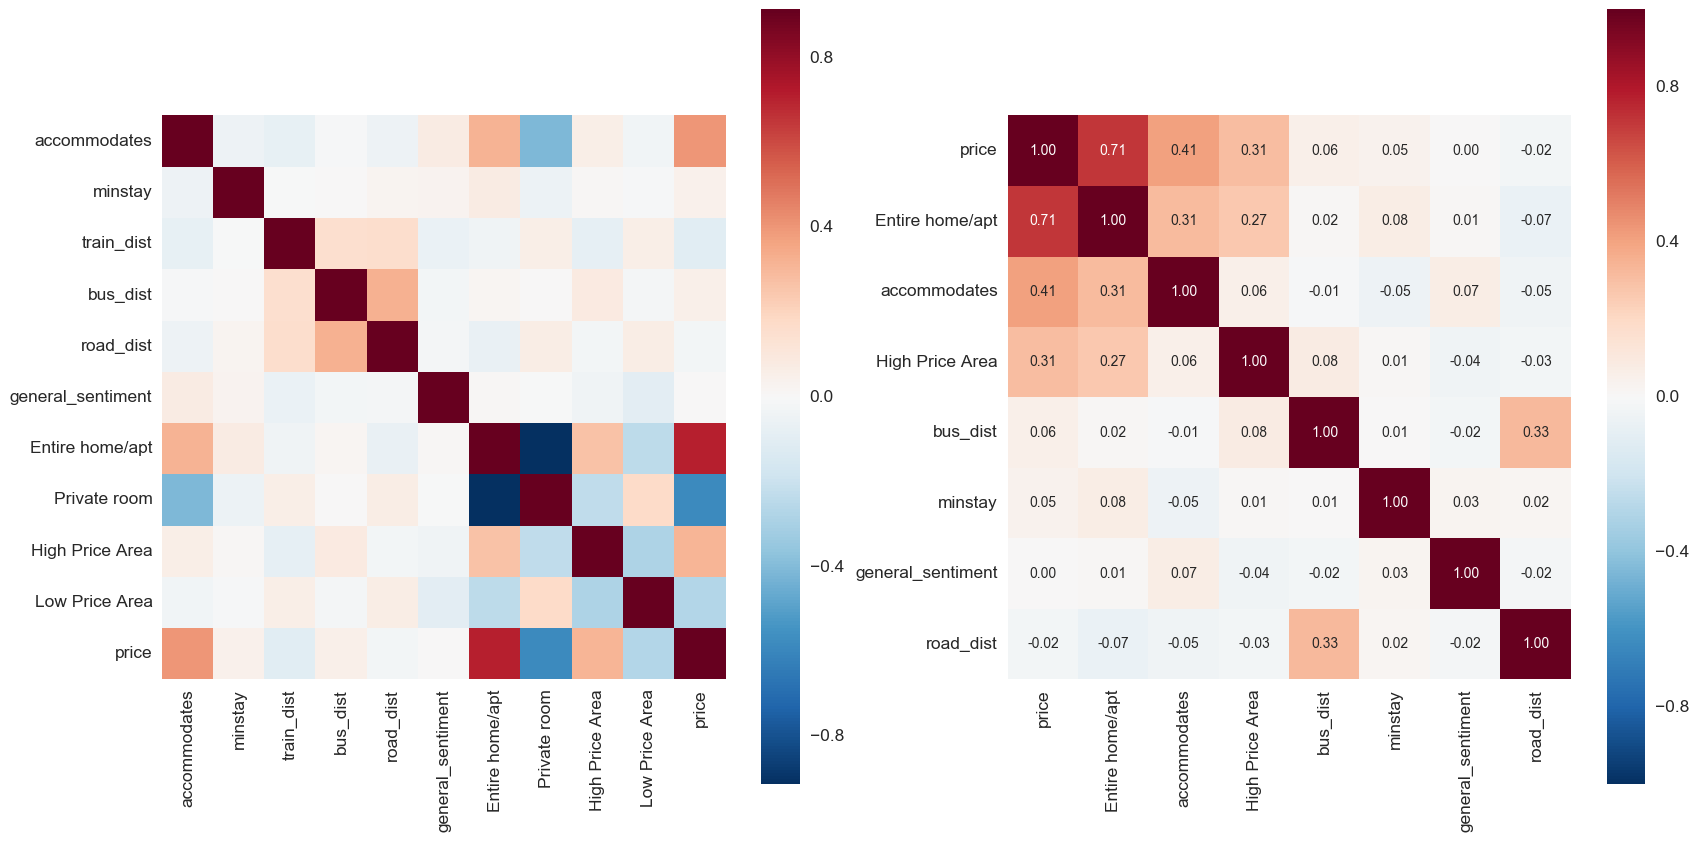

In [39]:
corr_new = airbnb_new.corr()
corr_mat_new = airbnb_new.corr()
k = 8
cols_new = corr_mat_new.nlargest(k, "price")["price"].index
cm_new = np.corrcoef(airbnb_new[cols_new].values.T)

sns.set(font_scale=1.25)
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20, 10)
sns.heatmap(corr_new, vmax=.8, square=True, ax=ax[0])
sns.heatmap(cm_new, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols_new.values, xticklabels=cols_new.values, ax=ax[1])

In [40]:
import statsmodels.api as sm
new_model = sm.OLS(airbnb_y, airbnb_X)
results = new_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.071e+05
Date:                Sat, 15 Apr 2017   Prob (F-statistic):               0.00
Time:                        23:45:28   Log-Likelihood:                -8093.1
No. Observations:               12157   AIC:                         1.621e+04
Df Residuals:                   12147   BIC:                         1.628e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
accommodates          0.0926      0.00

#  

In [41]:
def log_if_not_zero(x):
    if(x == 0): return x
    else: return np.log(x)

In [42]:
airbnb_X_new = airbnb_X.copy()
airbnb_X_new["general_sentiment"] = airbnb_X_new["general_sentiment"].apply(log_if_not_zero)

In [43]:
general_sentiment = airbnb_X_new.loc[airbnb_X_new["general_sentiment"] != 0, "general_sentiment"].describe()

In [44]:
airbnb_X_new.loc[airbnb_X_new["general_sentiment"] == 0, "has_sentiment"] = 1
airbnb_X_new.loc[airbnb_X_new["general_sentiment"] != 0, "has_sentiment"] = 0

In [45]:
airbnb_X_new.head()

,accommodates,minstay,train_dist,bus_dist,road_dist,general_sentiment,Entire home/apt,Private room,High Price Area,Low Price Area,has_sentiment
0,1,5.0,-4.475283,-7.306198,-12.131445,4.069027,0.0,1.0,1.0,0.0,0.0
2,2,2.0,-5.087392,-6.077253,-7.175243,2.995732,1.0,0.0,1.0,0.0,0.0
3,1,7.0,-5.622387,-7.464947,-7.946521,3.555348,0.0,1.0,0.0,0.0,0.0
4,2,4.0,-4.719908,-5.768144,-5.654223,4.248495,0.0,1.0,0.0,0.0,0.0
6,6,1.0,-5.412225,-6.523454,-6.949908,2.639057,0.0,1.0,0.0,1.0,0.0


In [46]:
scores = cross_val_score(xgb_model, airbnb_X_new, airbnb_y, cv=20, scoring='neg_mean_squared_error', n_jobs=3)
print("RMSE: %0.5f" % np.sqrt(-scores.mean()))

RMSE: 0.40590


#  

In [47]:
airbnb_final = airbnb_X_new.join(airbnb_y)
airbnb_final.columns = ['accommodates', 'minstay', 'log(train_dist)', 'log(bus_dist)', 'log(road_dist)', 'log(general_sentiment)','Entire home/apt', 'Private room', 'High Price Area', 'Low Price Area', 'has_sentiment', 'log(price)']
airbnb_final_X = airbnb_final.drop('log(price)', axis=1)
airbnb_final_y = airbnb_final['log(price)']

In [48]:
airbnb_final.head()

,accommodates,minstay,log(train_dist),log(bus_dist),log(road_dist),log(general_sentiment),Entire home/apt,Private room,High Price Area,Low Price Area,has_sentiment,log(price)
0,1,5.0,-4.475283,-7.306198,-12.131445,4.069027,0.0,1.0,1.0,0.0,0.0,3.663562
2,2,2.0,-5.087392,-6.077253,-7.175243,2.995732,1.0,0.0,1.0,0.0,0.0,4.330733
3,1,7.0,-5.622387,-7.464947,-7.946521,3.555348,0.0,1.0,0.0,0.0,0.0,3.806662
4,2,4.0,-4.719908,-5.768144,-5.654223,4.248495,0.0,1.0,0.0,0.0,0.0,4.060443
6,6,1.0,-5.412225,-6.523454,-6.949908,2.639057,0.0,1.0,0.0,1.0,0.0,4.634729


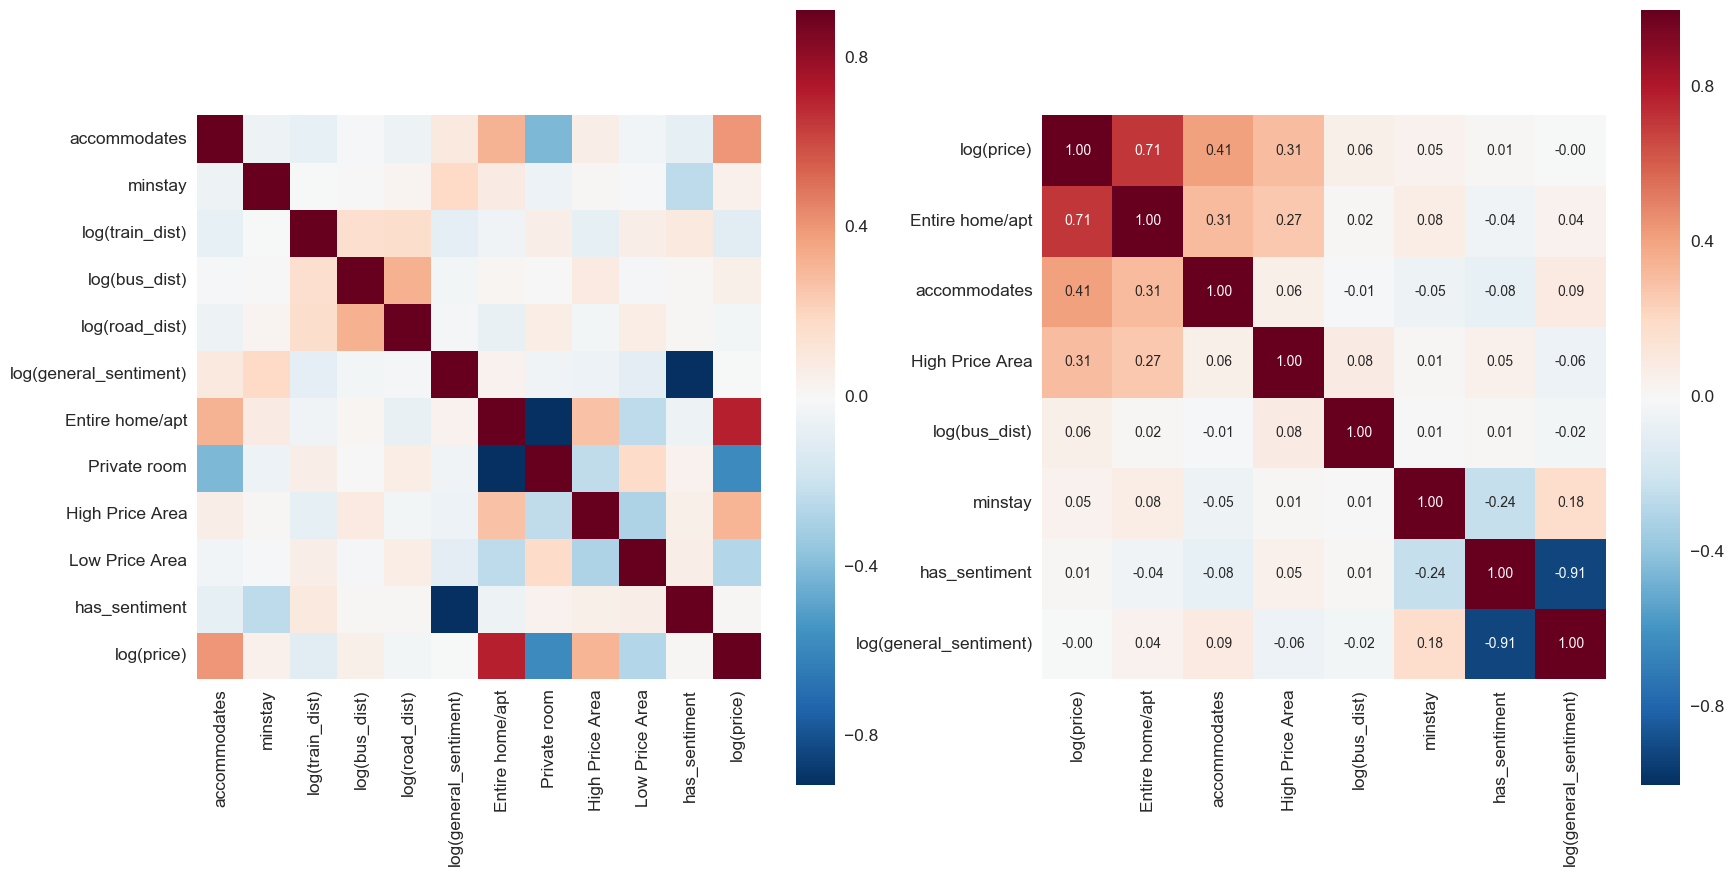

In [49]:
corr_final = airbnb_final.corr()
corr_mat_final = airbnb_final.corr()
k = 8
cols_final = corr_mat_final.nlargest(k, "log(price)")["log(price)"].index
cm_final = np.corrcoef(airbnb_final[cols_final].values.T)

sns.set(font_scale=1.25)
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20, 10)
sns.heatmap(corr_final, vmax=.8, square=True, ax=ax[0])
sns.heatmap(cm_final, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols_final.values, xticklabels=cols_final.values, ax=ax[1])

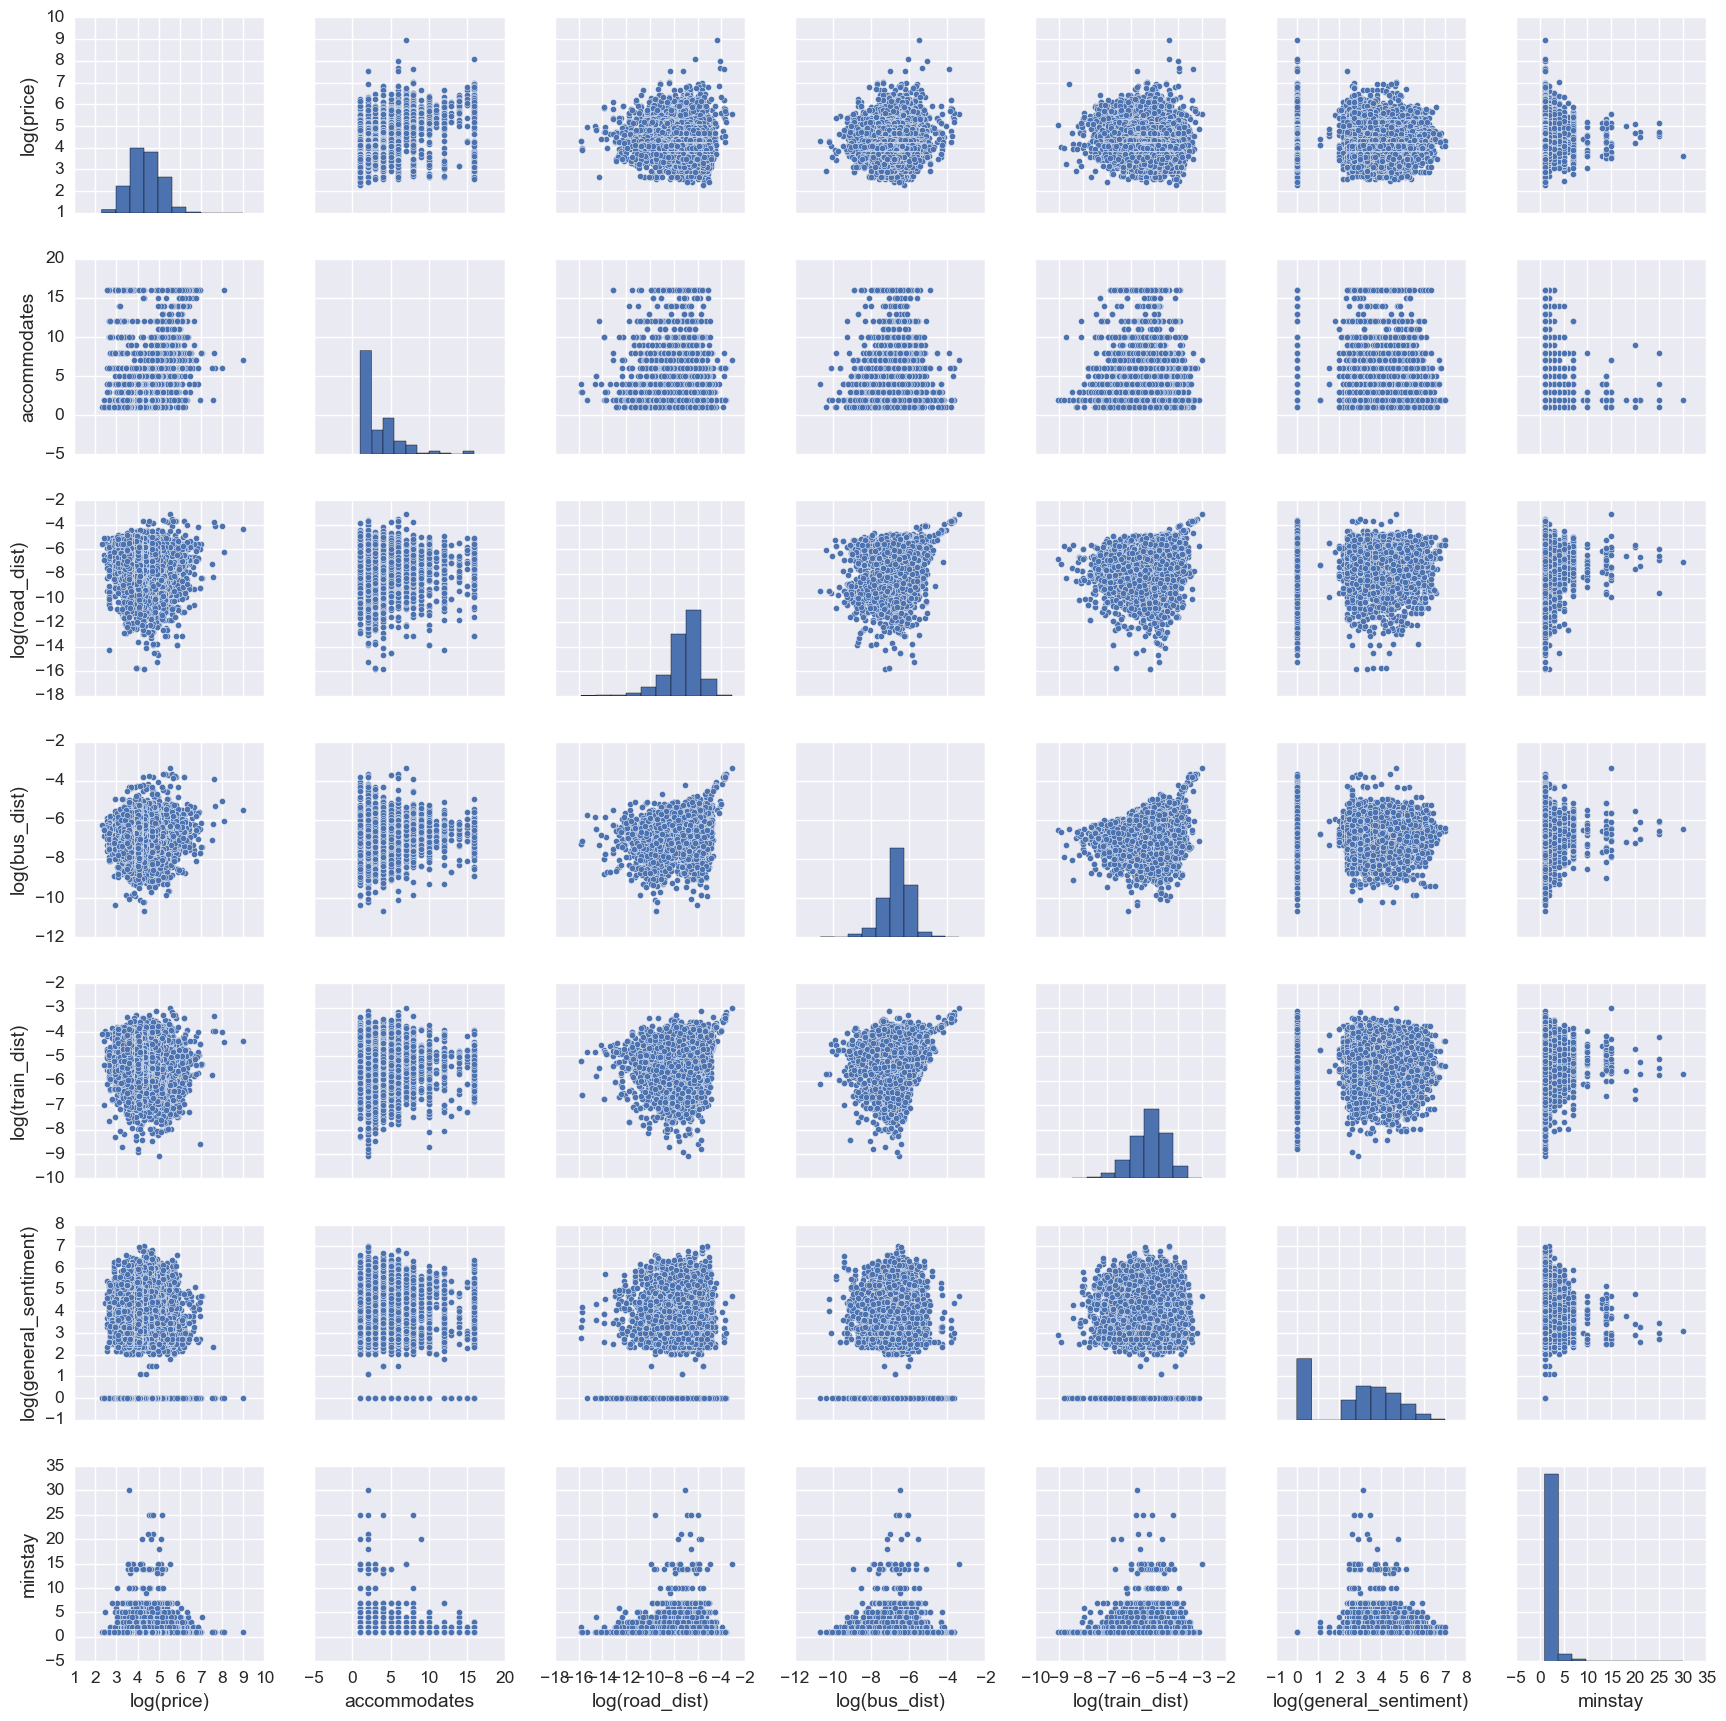

In [50]:
col = ['log(price)', 'accommodates', 'log(road_dist)', 'log(bus_dist)',
       'log(train_dist)', 'log(general_sentiment)', 'minstay']
sns.pairplot(airbnb_final[col])

In [51]:
new_model = sm.OLS(airbnb_final_y, airbnb_final_X)
results = new_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             log(price)   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.013e+05
Date:                Sat, 15 Apr 2017   Prob (F-statistic):               0.00
Time:                        23:45:45   Log-Likelihood:                -7849.2
No. Observations:               12157   AIC:                         1.572e+04
Df Residuals:                   12146   BIC:                         1.580e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
accommodates               0

In [52]:
new_model = sm.OLS(airbnb_final_y, airbnb_final_X.drop("log(road_dist)", axis=1))
results = new_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             log(price)   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.115e+05
Date:                Sat, 15 Apr 2017   Prob (F-statistic):               0.00
Time:                        23:45:45   Log-Likelihood:                -7849.3
No. Observations:               12157   AIC:                         1.572e+04
Df Residuals:                   12147   BIC:                         1.579e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
accommodates               0

In [53]:
X_train, X_test, y_train, y_test = train_test_split(airbnb_final_X.drop("log(road_dist)", axis=1), airbnb_final_y, test_size=0.33)
model = xgb.XGBRegressor(learning_rate=0.36).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error
print("RMSE: %0.5f" % np.sqrt(mean_squared_error(y_pred, y_test)))

RMSE: 0.36988


In [55]:
pd.concat([pd.Series(model.predict(X_test), index=X_test.index), y_test], axis=1, keys=["pred_price", "actual_price"]).apply(lambda x: np.e**x).head(20)

,pred_price,actual_price
7391,48.365208,41.0
6413,17.752686,15.0
12861,204.682816,291.0
6256,21.743458,22.0
11741,55.132809,53.0
18471,48.739101,36.0
3859,56.549755,82.0
2008,198.776550,244.0
19242,58.377617,36.0
3740,56.466331,83.0


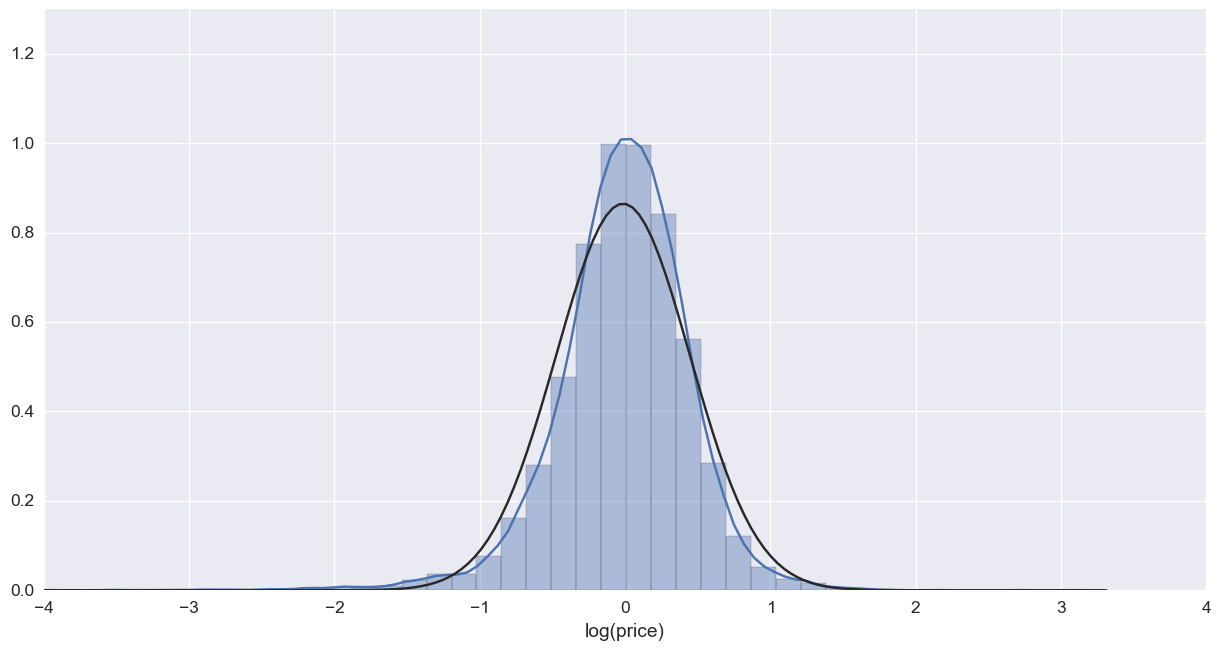

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 7.5)
ax.set_xlim([-4, 4])
ax.set_ylim([0, 1.3])
ax.set_xlabel("log(price)")
sns.distplot(pd.Series(results.predict(), index=airbnb_final.index) - airbnb_final["log(price)"], fit=norm)

#  